In [1]:
import torch

# Load the generator and discriminator models
generator = torch.load('./G.pth')
discriminator = torch.load('./D.pth')

# Set the models to evaluation mode
# generator.eval()
# discriminator.eval()
print(generator)

OrderedDict({'0.weight': tensor([[[[-1.8003e-02, -5.2134e-02, -2.9848e-02, -2.0676e-02],
          [-2.5170e-02,  8.3894e-03, -4.0102e-02, -4.4974e-02],
          [-1.1771e-02,  6.9445e-03, -2.5737e-02,  6.1344e-03],
          [-8.8608e-03,  3.9454e-02, -3.8693e-03, -4.6891e-03]],

         [[-1.7922e-02,  2.7787e-02, -3.0855e-02, -1.2783e-03],
          [ 1.7363e-02,  4.9670e-02,  2.1230e-02,  5.3628e-03],
          [-1.1501e-02,  4.4935e-03, -1.0191e-02,  3.3188e-02],
          [ 8.8582e-03,  1.9674e-02,  5.8712e-03,  5.1785e-03]],

         [[-1.3693e-02,  8.5251e-03,  2.4920e-02,  1.0675e-02],
          [ 5.0789e-02,  1.2470e-02,  3.9170e-02,  4.6546e-02],
          [-1.2269e-02, -8.6041e-03,  7.1013e-03, -2.4165e-03],
          [-1.5224e-02,  2.5365e-02, -4.3551e-02, -1.3960e-02]],

         ...,

         [[ 3.6057e-03, -2.8977e-03, -1.5883e-03,  2.1339e-05],
          [-8.8603e-03, -1.3520e-03, -7.3940e-03, -2.5008e-02],
          [-3.1465e-02, -1.1256e-02,  1.8371e-02, -1.2589e

In [2]:
import torch.nn as nn
generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(128, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)

generator.load_state_dict(torch.load('./G.pth'))

<All keys matched successfully>

In [4]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)


def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]


def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

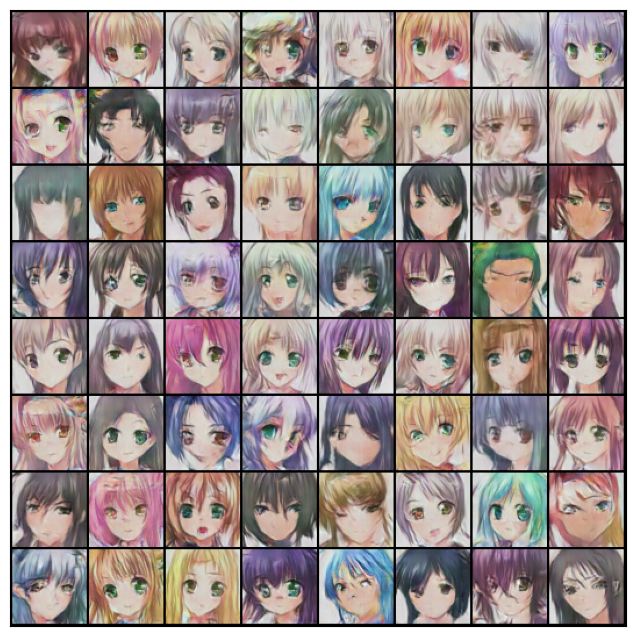

In [8]:

# Set the generator to evaluation mode
# generator.eval()
latent_size = 128
batch_size = 128
# Generate samples

num_samples = 10  # Set the number of samples you want to generate
noise = torch.randn(batch_size, latent_size, 1, 1)  # Assuming latent_dim is the dimension of the generator input
generated_samples = generator(noise)
show_images(generated_samples)


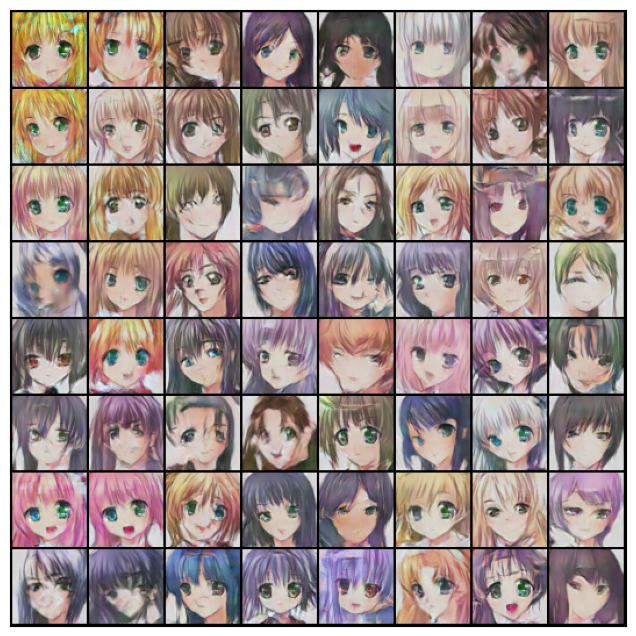